## House prediction of Ames House dataset

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Let us first perform EDA and data cleaning 

In [8]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [9]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
train_ID = df_train['Id']
test_ID = df_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

#### The outcome variable is House price and we are going to see how different attributes have an impact on the house prices.

In [11]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

#### Let us see the distribution of outcome variable SalePrice

In [14]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

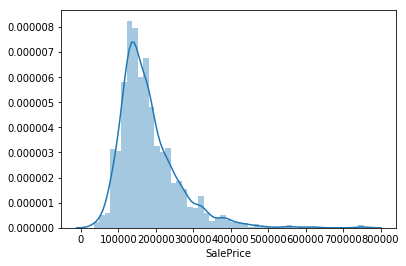

In [16]:
sns.distplot(df_train['SalePrice'])

#### We can see that we dont have a normal distribution and is skewed to the right, Normality violation will affect the estimates of the standard error (SE) and the confidence interval.

#### Let us see how are attributes related to area affect the House proce 

In [20]:
area = ['GrLivArea','TotalBsmtSF', 'GarageArea']

<Figure size 432x288 with 0 Axes>

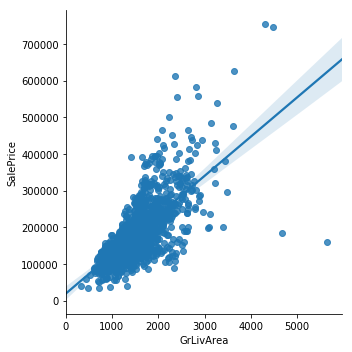

<Figure size 432x288 with 0 Axes>

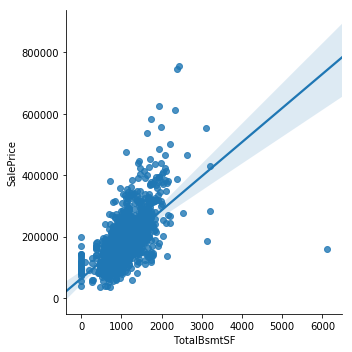

<Figure size 432x288 with 0 Axes>

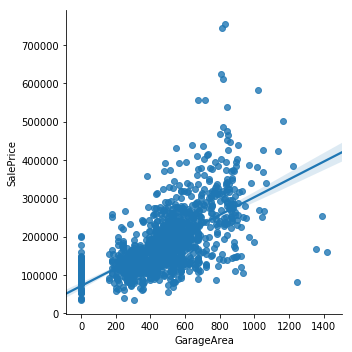

In [22]:
for columns in area:
    plt.figure()
    sns.lmplot(y="SalePrice", x=columns, data=df_train)

#### We can see there are few outliers and we will deal with them later.

#### Let us see how the SalePrice is related categorical variables like Overall quality and OverallCond of the plot

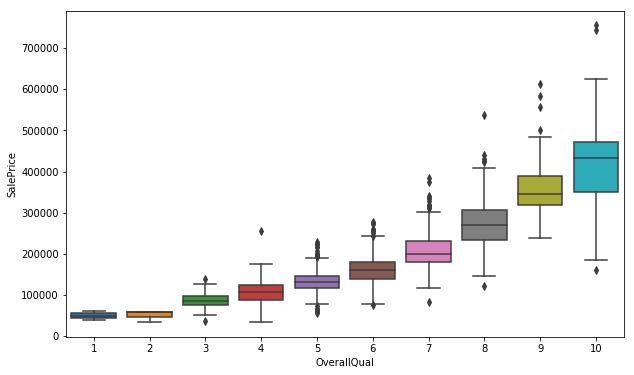

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train)
plt.show()

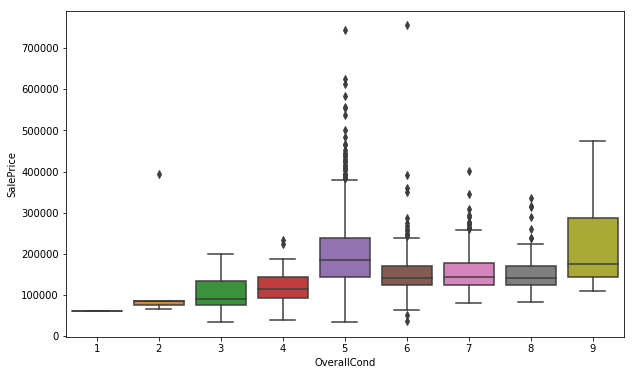

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='OverallCond', y='SalePrice', data=df_train)
plt.show()

#### We can see that with better house conditions the prices increase. 

#### Let us see how the house prices have changed over the years

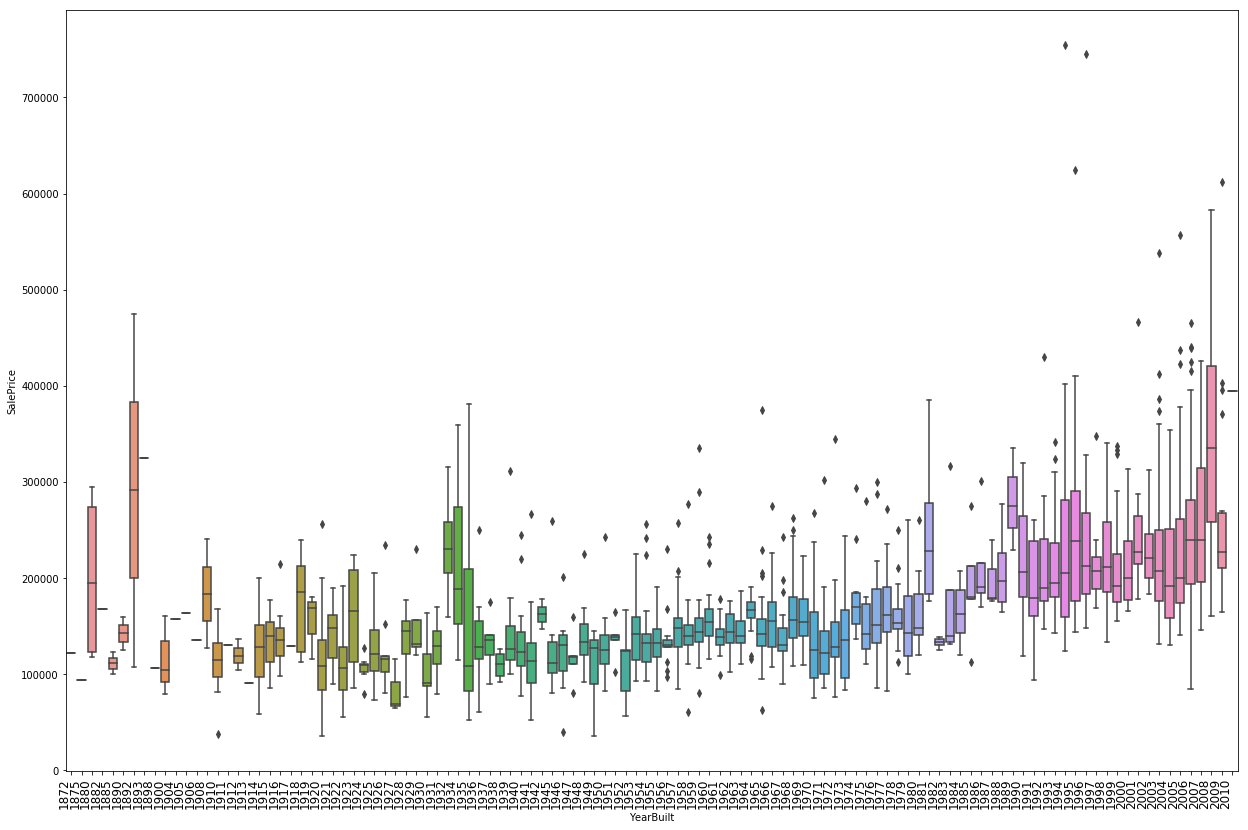

In [39]:
plt.figure(figsize=(21,14))
ax = sns.boxplot(x='YearBuilt', y='SalePrice', data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize= 12)
plt.show()

#### We can see the house prices have increased over the years and though a boxplot we can have an understanding of their distributions.

In [12]:
corr = df_train.corr()

Let us find the correlation between the variables

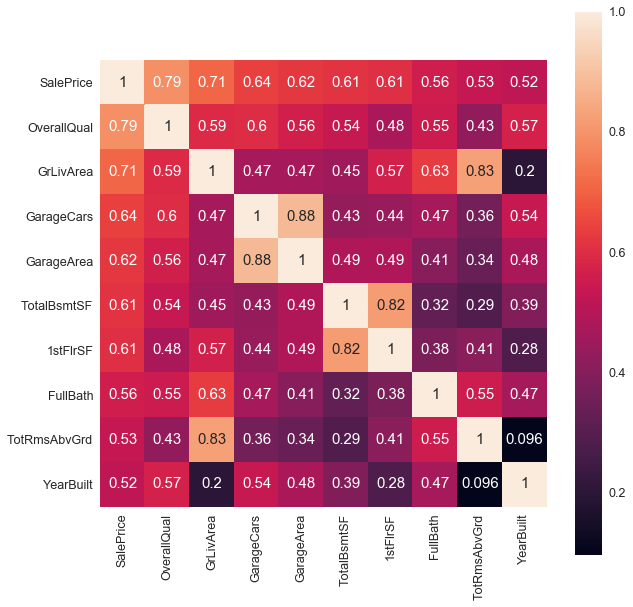

In [14]:
plt.figure(figsize=(10,10))
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,yticklabels=cols.values, xticklabels=cols.values)

#### Let us now convert the outcome variable into a normal disrtibution and remove the outliers.

In [45]:
df_train.sort_values(by = 'GrLivArea', ascending=False)[:2]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [44]:
df_train = df_train.drop(df_train.index[[1298,523]])

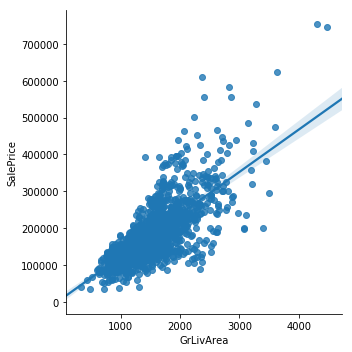

In [49]:
sns.lmplot(y="SalePrice", x='GrLivArea', data=df_train)
plt.show()

#### Here we have removed outliers with locations that had a large house size but had extremely low price these values would affect our over all prediction and hence we have removed them.

#### Let us deal with skewed distribution 

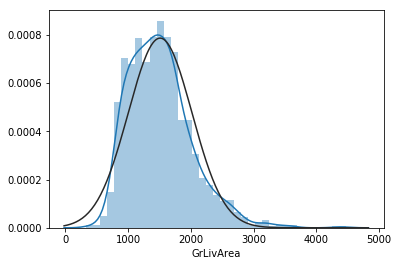

In [51]:
from scipy.stats import norm, skew 
from scipy import stats

sns.distplot(df_train['GrLivArea'], fit=norm)
plt.show()

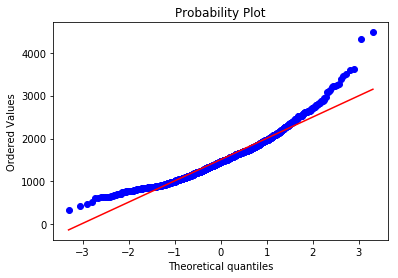

In [52]:
res = stats.probplot(df_train['GrLivArea'], plot = plt)


 mu = 2.57 and sigma = 0.03



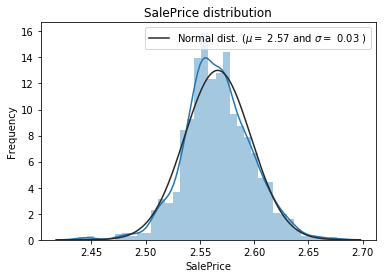

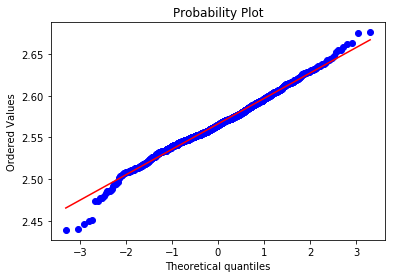

In [54]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

#### The distribution of the data may be normal, but the data may require a transform in order to help expose it. As in this distribution we could see some skewness which we handled using a log transformation.

In [55]:
print('Shape all_data: {}'.format(df_train.shape))

Shape all_data: (1458, 80)


#### Let us combine the data and perform some feature engineering

In [79]:
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
#y_train = all_data.SalePrice
all_data.drop(['SalePrice'], axis=1, inplace=True)

print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


#### Let's deal with missing data 

In [80]:
a = all_data.isna().sum().sort_values(ascending = False)[:50]
a.head(36)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageYrBlt      159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
Electrical         1
Exterior2nd        1
KitchenQual        1
GarageCars         1
Exterior1st        1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Condition2         0
FullBath           0
dtype: int64

#### We can see that we have a lot of missing values in the features

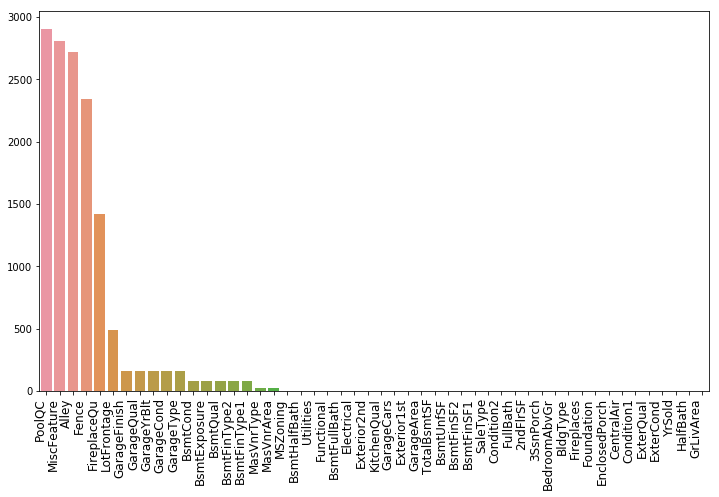

In [81]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=a.index, y = a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize= 12)
plt.show()

In [82]:
#Based on data description NA means no pool and we hence can fill it with 'None'
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

#Similarly NA indicates no feature here and we hence can fill it with 'None'
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")

#FireplaceQu : data description says NA means "no fireplace"
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [83]:
#Since area of a street is connected to the house property we can fill in missing values by the median LotFrontage of the neighborhood.

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#Replace Na values with 'None'
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

#If there are no garages then there wouldn't be any cars and would have 0 area.
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

#Similarly if there is no basement then the following values would be 0 
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

#Similarly None for categorical attributes
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

#And Similarly based on the data description we can fill there with None and 0
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#Here 'RL' is the most common value and we can fill this in using mode
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [84]:
# For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA so it is safe to drop it
all_data = all_data.drop(['Utilities'], axis=1)

# Data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

#It has one NA value. and is mostly 'SBrkr', we can use mode imputation for the missing value
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

#Just like electrical it has one missing value
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

#Same as above
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

#Na most likely means No building class
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

#### Let us see if there are any null values remaining

In [85]:
all_data.isnull().sum().sort_values(ascending = False).head()

YrSold         0
Foundation     0
ExterCond      0
ExterQual      0
Exterior1st    0
dtype: int64

In [86]:
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


#### Let us deal with categorical variables

#### Some attributes are actually categorical so it is required to transform them

In [88]:
#The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#OverallCond as categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold as categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

#### Using label encoder on categorical attributes

In [96]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


#### Since area related features are very important to determine house prices, we can one more feature which is the total area of basement, first and second floor areas of each house

In [32]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [97]:
numeric_features = all_data.dtypes[all_data.dtypes != object].index

#### Let us see if there is skewness in the data

In [98]:
skewed_features = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame({'Skew' : skewed_features})
skewness.head(10)

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [99]:
skewness = skewness[abs(skewness.Skew)>0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 35 skewed numerical features to Box Cox transform


In [100]:
all_data = pd.get_dummies(all_data)
print(all_data.shape) 

(2917, 219)


### Lets use machine learning

In [101]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
train = all_data[:ntrain]
test = all_data[ntrain:]

In [102]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [103]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data.<br> That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [104]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

Lasso uses L1 regularization technique <br>
It is generally used when we have more number of features, because it automatically does feature selection.

In [105]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

Elastic net is basically a combination of both L1 and L2 regularization. So if you know elastic net, you can implement both Ridge and Lasso by tuning the parameters. So it uses both L1 and L2 penality term <br>
<br>
We have a bunch of correlated independent variables in a dataset, then elastic net will simply form a group consisting of these correlated variables. Now if any one of the variable of this group is a strong predictor (meaning having a strong relationship with dependent variable), then we will include the entire group in the model building, because omitting other variables (like what we did in lasso) might result in losing some information in terms of interpretation ability, leading to a poor model performance.

In [106]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

Kernel ridge regression is essentially the same as usual ridge regression, but uses the kernel trick to go non-linear.

In [107]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made.
<br>
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.



In [108]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [109]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

In [110]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0097 (0.0005)



In [111]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0097 (0.0005)



In [112]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.0139 (0.0007)



In [113]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.0091 (0.0005)



In [114]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0196 (0.0011)



In [66]:
#In this method, we take an average of predictions from all the models and use it to make the final prediction.

In [115]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [116]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0091 (0.0005)



#### Final Training and Prediction

In [119]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [121]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.018319487909283033


In [122]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.0056445419979932205


#### Hence we can see the analysis of a complex dataset and the advanced techniques we can use to improve our accuracy!